## Assignment 2
Chapter 03

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm

### Question 2

Carefully explain the differences between the KNN classifier and KNN regression methods. <br>
KNN classifier predicts a category by taking a majority vote among the K nearest neighbors. <br>
KNN regression predicts a numerical value by averaging the values of the K nearest neighbors. <br>

### Question 9
This question involves the use of multiple linear regression on the Auto data set.

In [3]:
auto = pd.read_csv(r'C:\Users\lizob\PyCharmMiscProject\data\Auto.csv')


(a) Produce a scatterplot matrix which includes all of the variables
in the data set.






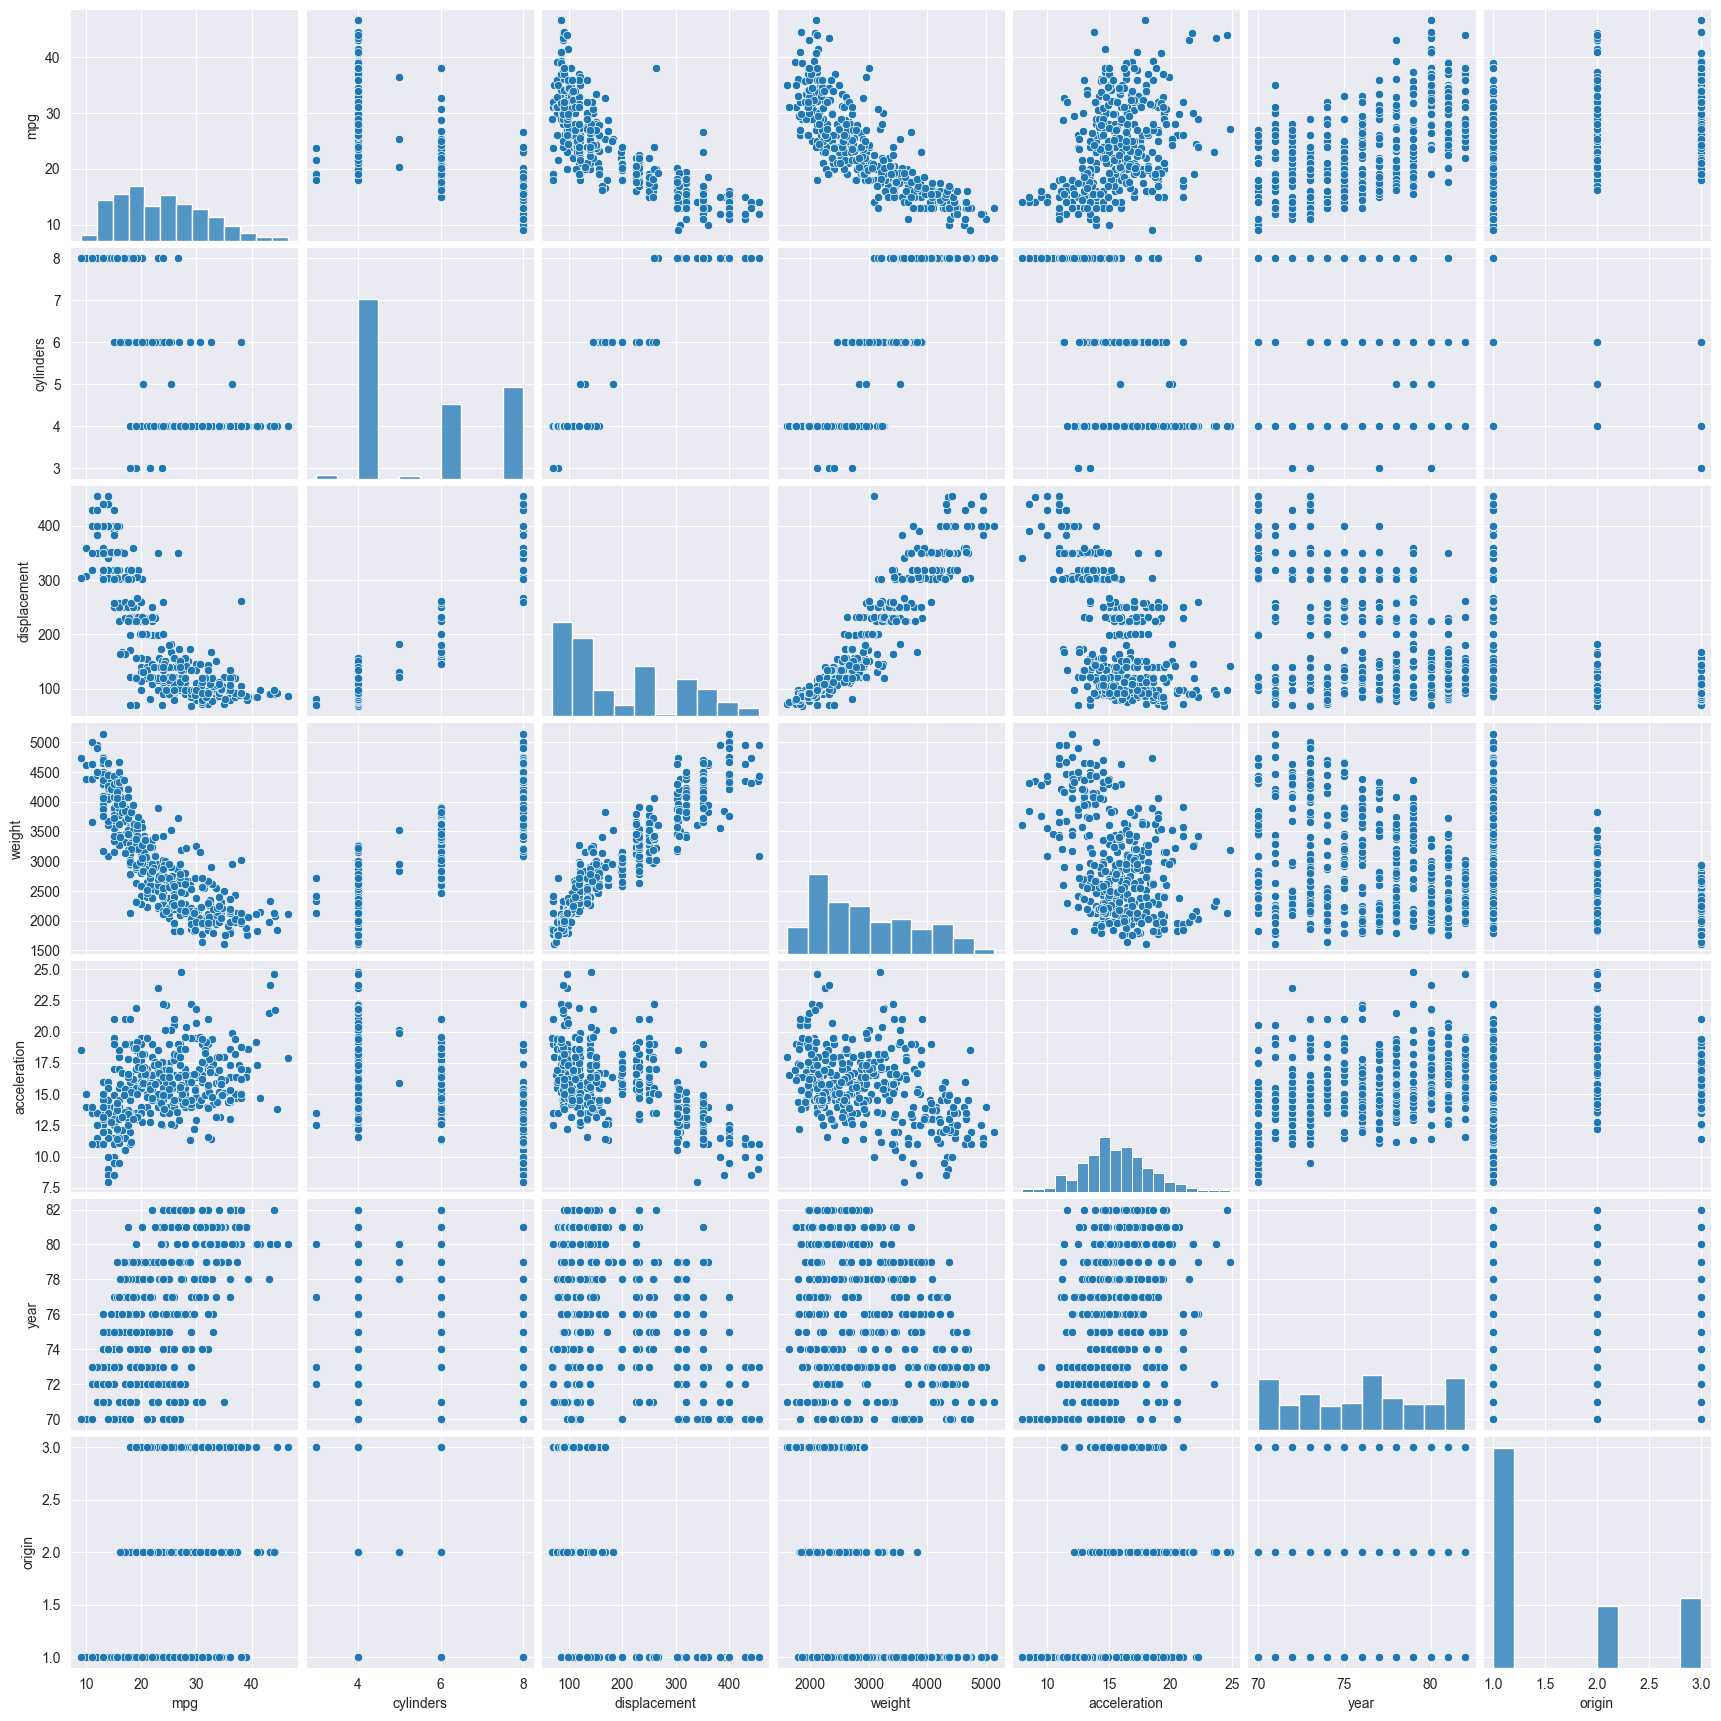

In [4]:
sns.pairplot(auto)

# Show the plot
plt.show()

(b) Compute the matrix of correlations between the variables using the DataFrame.corr() method. .corr()

In [5]:
correlation_matrix = auto.select_dtypes(include='number').corr()

# Display the matrix
print(correlation_matrix)

                   mpg  cylinders  displacement    weight  acceleration  \
mpg           1.000000  -0.776260     -0.804443 -0.831739      0.422297   
cylinders    -0.776260   1.000000      0.950920  0.897017     -0.504061   
displacement -0.804443   0.950920      1.000000  0.933104     -0.544162   
weight       -0.831739   0.897017      0.933104  1.000000     -0.419502   
acceleration  0.422297  -0.504061     -0.544162 -0.419502      1.000000   
year          0.581469  -0.346717     -0.369804 -0.307900      0.282901   
origin        0.563698  -0.564972     -0.610664 -0.581265      0.210084   

                  year    origin  
mpg           0.581469  0.563698  
cylinders    -0.346717 -0.564972  
displacement -0.369804 -0.610664  
weight       -0.307900 -0.581265  
acceleration  0.282901  0.210084  
year          1.000000  0.184314  
origin        0.184314  1.000000  


(c) Use the sm.OLS() function to perform a multiple linear regression
with mpg as the response and all other variables except name as
the predictors. Use the summarize() function to print the results.
Comment on the output. For instance: <br>
i. Is there a relationship between the predictors and the response?
Use the anova_lm() function from statsmodels to
answer this question. <br>
ii. Which predictors appear to have a statistically significant
relationship to the response? <br>
iii. What does the coefficient for the year variable suggest? <br>

In [11]:
# drop non numeric columns
auto_clean = auto.drop(columns=['name']).dropna()

auto_clean['horsepower'] = pd.to_numeric(auto_clean['horsepower'], errors='coerce')
auto_clean = auto_clean.dropna()

print("=== AFTER CLEANING ===")
print(f"Final dataset shape: {auto_clean.shape}")
print("Final data types:")
print(auto_clean.dtypes)
print("\n")

# Prepare the data for sm.OLS()
X = auto_clean.drop(columns=['mpg'])  # Predictors
y = auto_clean['mpg']  # Response variable

# Add constant term for intercept
X = sm.add_constant(X)

# Fit the multiple linear regression model using sm.OLS()
model = sm.OLS(y, X).fit()

# Print the summary
print("=== MULTIPLE LINEAR REGRESSION RESULTS ===")
print(model.summary())
print("\n")

# Question i: Is there a relationship between predictors and response?
print("=== QUESTION i: OVERALL MODEL SIGNIFICANCE (ANOVA-like analysis) ===")

# Manual ANOVA table calculation
n = model.nobs  # number of observations
k = model.df_model  # number of predictors (excluding intercept)
df_model = k  # degrees of freedom for model
df_resid = model.df_resid  # degrees of freedom for residuals

# Sum of squares
ss_total = np.sum((y - np.mean(y))**2)
ss_residual = model.ssr  # sum of squared residuals
ss_model = ss_total - ss_residual  # explained sum of squares

# Mean squares
ms_model = ss_model / df_model
ms_residual = ss_residual / df_resid

# F-statistic (same as model.fvalue)
f_stat = ms_model / ms_residual
f_pvalue = model.f_pvalue

print("ANOVA Table:")
print(f"{'Source':<12} {'df':<6} {'Sum Sq':<12} {'Mean Sq':<12} {'F-stat':<10} {'p-value':<10}")
print("-" * 70)
print(f"{'Model':<12} {df_model:<6.0f} {ss_model:<12.2f} {ms_model:<12.2f} {f_stat:<10.4f} {f_pvalue:<10.2e}")
print(f"{'Residual':<12} {df_resid:<6.0f} {ss_residual:<12.2f} {ms_residual:<12.2f}")
print(f"{'Total':<12} {n-1:<6.0f} {ss_total:<12.2f}")
print()

print(f"Overall F-statistic: {f_stat:.4f}")
print(f"Overall p-value: {f_pvalue:.2e}")

if f_pvalue < 0.05:
    print("CONCLUSION: YES, there IS a statistically significant relationship between the predictors and mpg (p < 0.05)")
else:
    print("CONCLUSION: NO, there is NOT a statistically significant relationship between the predictors and mpg (p >= 0.05)")
print("\n")

=== AFTER CLEANING ===
Final dataset shape: (392, 8)
Final data types:
mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
year              int64
origin            int64
dtype: object


=== MULTIPLE LINEAR REGRESSION RESULTS ===
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Thu, 19 Jun 2025   Prob (F-statistic):          2.04e-139
Time:                        11:47:47   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7         

In [12]:
# Question ii: Which predictors are statistically significant?
print("=== QUESTION ii: STATISTICALLY SIGNIFICANT PREDICTORS ===")
print("Coefficients and p-values:")
for variable, pvalue in model.pvalues.items():
    significance = "***" if pvalue < 0.001 else "**" if pvalue < 0.01 else "*" if pvalue < 0.05 else ""
    print(f"{variable:12s}: p-value = {pvalue:.6f} {significance}")

significant_vars = model.pvalues[model.pvalues < 0.05].index.tolist()
print(f"\nStatistically significant predictors (p < 0.05): {significant_vars}")
print("\n")

=== QUESTION ii: STATISTICALLY SIGNIFICANT PREDICTORS ===
Coefficients and p-values:
const       : p-value = 0.000240 ***
cylinders   : p-value = 0.127796 
displacement: p-value = 0.008445 **
horsepower  : p-value = 0.219633 
weight      : p-value = 0.000000 ***
acceleration: p-value = 0.415478 
year        : p-value = 0.000000 ***
origin      : p-value = 0.000000 ***

Statistically significant predictors (p < 0.05): ['const', 'displacement', 'weight', 'year', 'origin']




In [13]:
# Question iii: Interpretation of year coefficient
print("=== QUESTION iii: YEAR COEFFICIENT INTERPRETATION ===")
if 'year' in model.params.index:
    year_coef = model.params['year']
    year_pvalue = model.pvalues['year']
    print(f"Year coefficient: {year_coef:.4f}")
    print(f"Year p-value: {year_pvalue:.6f}")
    print(f"Interpretation: For each additional year, mpg {'increases' if year_coef > 0 else 'decreases'} by {abs(year_coef):.4f} units on average, holding other variables constant.")
    if year_pvalue < 0.05:
        print("This relationship is statistically significant.")
    else:
        print("This relationship is not statistically significant.")
else:
    print("Year variable not found in the model.")

print("\n=== ADDITIONAL MODEL DIAGNOSTICS ===")
print(f"R-squared: {model.rsquared:.4f}")
print(f"Adjusted R-squared: {model.rsquared_adj:.4f}")
print(f"Number of observations: {model.nobs}")
print(f"Degrees of freedom: {model.df_resid}")

=== QUESTION iii: YEAR COEFFICIENT INTERPRETATION ===
Year coefficient: 0.7508
Year p-value: 0.000000
Interpretation: For each additional year, mpg increases by 0.7508 units on average, holding other variables constant.
This relationship is statistically significant.

=== ADDITIONAL MODEL DIAGNOSTICS ===
R-squared: 0.8215
Adjusted R-squared: 0.8182
Number of observations: 392.0
Degrees of freedom: 384.0


(d) Produce some of diagnostic plots of the linear regression fit as
described in the lab. Comment on any problems you see with the
fit. Do the residual plots suggest any unusually large outliers?
Does the leverage plot identify any observations with unusually
high leverage?

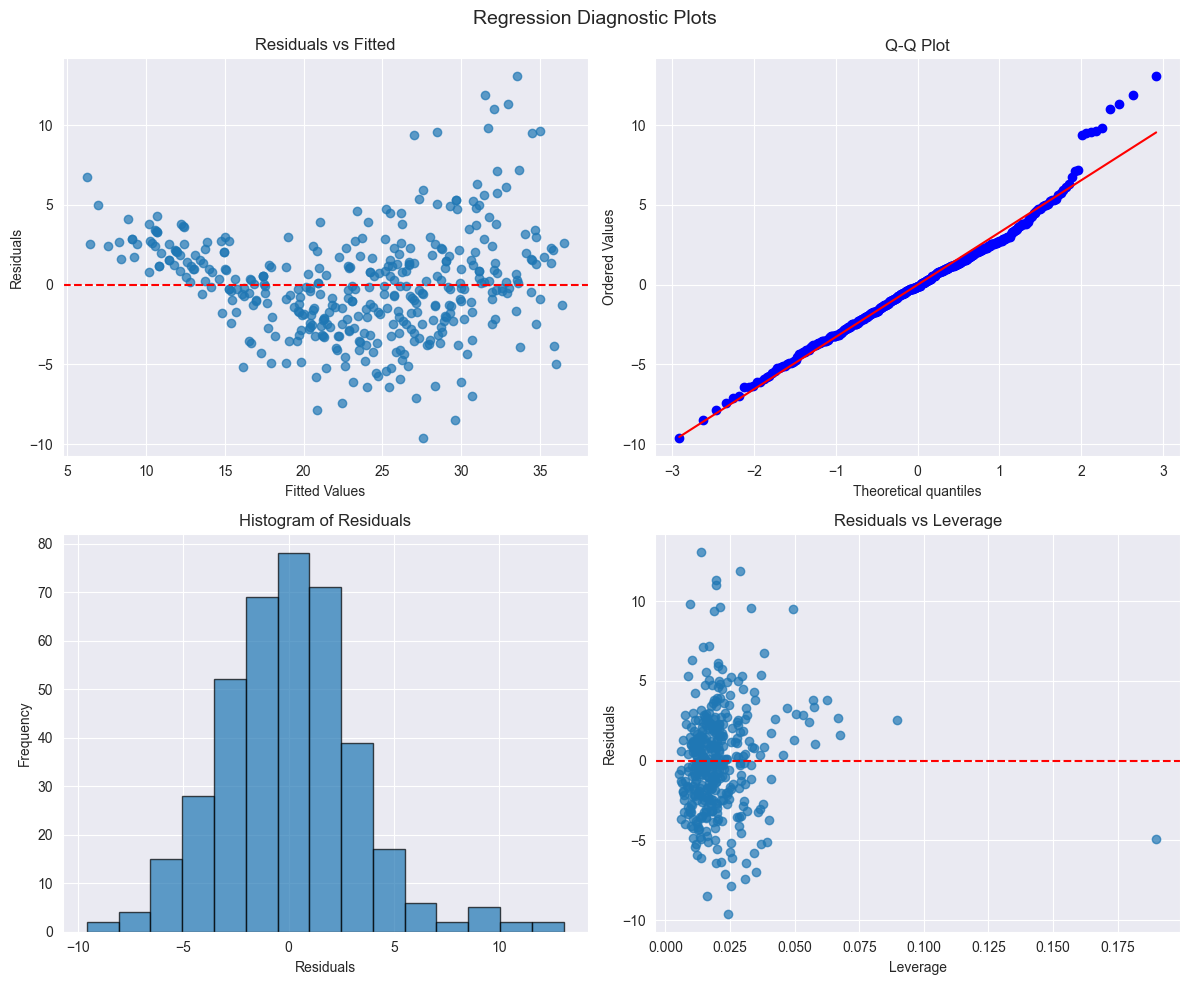

=== DIAGNOSTIC SUMMARY ===
Number of potential outliers (|residual| > 2 std): 18
Outlier observations: [np.int64(43), np.int64(107), np.int64(110), np.int64(153), np.int64(164), np.int64(242), np.int64(245), np.int64(268), np.int64(307), np.int64(320), np.int64(322), np.int64(323), np.int64(324), np.int64(325), np.int64(327), np.int64(331), np.int64(381), np.int64(388)]

Number of high leverage points: 17
High leverage observations: [np.int64(6), np.int64(7), np.int64(8), np.int64(12), np.int64(13), np.int64(25), np.int64(26), np.int64(27), np.int64(28), np.int64(93), np.int64(94), np.int64(115), np.int64(209), np.int64(297), np.int64(298), np.int64(359), np.int64(388)]

Normality test p-value: 0.0000
Residuals may not be normally distributed


In [14]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Regression Diagnostic Plots', fontsize=14)

# Get basic values from the model
fitted = model.fittedvalues
residuals = model.resid
leverage = model.get_influence().hat_matrix_diag

# 1. Residuals vs Fitted
axes[0, 0].scatter(fitted, residuals, alpha=0.7)
axes[0, 0].axhline(y=0, color='red', linestyle='--')
axes[0, 0].set_xlabel('Fitted Values')
axes[0, 0].set_ylabel('Residuals')
axes[0, 0].set_title('Residuals vs Fitted')

# 2. Q-Q Plot
stats.probplot(residuals, dist="norm", plot=axes[0, 1])
axes[0, 1].set_title('Q-Q Plot')

# 3. Histogram of Residuals
axes[1, 0].hist(residuals, bins=15, alpha=0.7, edgecolor='black')
axes[1, 0].set_xlabel('Residuals')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Histogram of Residuals')

# 4. Leverage Plot
axes[1, 1].scatter(leverage, residuals, alpha=0.7)
axes[1, 1].set_xlabel('Leverage')
axes[1, 1].set_ylabel('Residuals')
axes[1, 1].set_title('Residuals vs Leverage')
axes[1, 1].axhline(y=0, color='red', linestyle='--')

plt.tight_layout()
plt.show()

# Simple diagnostic checks
print("=== DIAGNOSTIC SUMMARY ===")

# Check for outliers (residuals > 2 standard deviations)
std_residuals = residuals / np.std(residuals)
outliers = np.where(np.abs(std_residuals) > 2)[0]
print(f"Number of potential outliers (|residual| > 2 std): {len(outliers)}")
if len(outliers) > 0:
    print(f"Outlier observations: {list(outliers)}")

# Check for high leverage points
n = len(residuals)
p = len(model.params)
leverage_threshold = 2 * p / n
high_leverage = np.where(leverage > leverage_threshold)[0]
print(f"\nNumber of high leverage points: {len(high_leverage)}")
if len(high_leverage) > 0:
    print(f"High leverage observations: {list(high_leverage)}")

# Check normality of residuals
_, normality_p = stats.shapiro(residuals)
print(f"\nNormality test p-value: {normality_p:.4f}")
if normality_p < 0.05:
    print("Residuals may not be normally distributed")
else:
    print("Residuals appear normally distributed")

(e) Fit some models with interactions as described in the lab. Do
any interactions appear to be statistically significant?

In [31]:
# (e) Fit some models with interactions
print("=== MODELS WITH INTERACTION TERMS ===")

# Base model for comparison
X_base = auto_clean.drop(columns=['mpg'])
y = auto_clean['mpg']
X_base = sm.add_constant(X_base)
model_base = sm.OLS(y, X_base).fit()
print(f"Base model R²: {model_base.rsquared:.4f}")

# Model with weight × horsepower interaction
X_interact1 = auto_clean.drop(columns=['mpg']).copy()
X_interact1['weight_x_horsepower'] = X_interact1['weight'] * X_interact1['horsepower']
X_interact1 = sm.add_constant(X_interact1)
model_interact1 = sm.OLS(y, X_interact1).fit()

weight_hp_pval = model_interact1.pvalues['weight_x_horsepower']
print(f"Weight × Horsepower: p = {weight_hp_pval:.4f}")

# Model with displacement × cylinders interaction
X_interact2 = auto_clean.drop(columns=['mpg']).copy()
X_interact2['displacement_x_cylinders'] = X_interact2['displacement'] * X_interact2['cylinders']
X_interact2 = sm.add_constant(X_interact2)
model_interact2 = sm.OLS(y, X_interact2).fit()

disp_cyl_pval = model_interact2.pvalues['displacement_x_cylinders']
print(f"Displacement × Cylinders: p = {disp_cyl_pval:.4f}")

# Check significance
interactions = [
    ('Weight × Horsepower', weight_hp_pval),
    ('Displacement × Cylinders', disp_cyl_pval)
]

significant = [name for name, pval in interactions if pval < 0.05]
if significant:
    print(f"Significant interactions: {', '.join(significant)}")
else:
    print("No significant interactions found")

=== MODELS WITH INTERACTION TERMS ===
Base model R²: 0.8215
Weight × Horsepower: p = 0.0000
Displacement × Cylinders: p = 0.0000
Significant interactions: Weight × Horsepower, Displacement × Cylinders


(f) Try a few different transformations of the variables, such as log(X), 'X, X2. Comment on your findings.

In [32]:
# (f) Try different transformations of variables
print("=== VARIABLE TRANSFORMATIONS ===")

# Base model
X_base = auto_clean.drop(columns=['mpg'])
y = auto_clean['mpg']
X_base = sm.add_constant(X_base)
model_base = sm.OLS(y, X_base).fit()
print(f"Base model Adj. R²: {model_base.rsquared_adj:.4f}")

# Log transformations
X_log = auto_clean.drop(columns=['mpg']).copy()
X_log['log_weight'] = np.log(X_log['weight'])
X_log['log_horsepower'] = np.log(X_log['horsepower'])
X_log = X_log.drop(columns=['weight', 'horsepower'])
X_log = sm.add_constant(X_log)
model_log = sm.OLS(y, X_log).fit()
print(f"Log transformations Adj. R²: {model_log.rsquared_adj:.4f}")

# Polynomial (X²) terms
X_poly = auto_clean.drop(columns=['mpg']).copy()
X_poly['weight_squared'] = X_poly['weight'] ** 2
X_poly['horsepower_squared'] = X_poly['horsepower'] ** 2
X_poly = sm.add_constant(X_poly)
model_poly = sm.OLS(y, X_poly).fit()
print(f"Polynomial terms Adj. R²: {model_poly.rsquared_adj:.4f}")

# Square root transformations
X_sqrt = auto_clean.drop(columns=['mpg']).copy()
X_sqrt['sqrt_weight'] = np.sqrt(X_sqrt['weight'])
X_sqrt['sqrt_displacement'] = np.sqrt(X_sqrt['displacement'])
X_sqrt = X_sqrt.drop(columns=['weight', 'displacement'])
X_sqrt = sm.add_constant(X_sqrt)
model_sqrt = sm.OLS(y, X_sqrt).fit()
print(f"Square root transformations Adj. R²: {model_sqrt.rsquared_adj:.4f}")

# Compare results
models = [
    ('Base', model_base.rsquared_adj),
    ('Log', model_log.rsquared_adj),
    ('Polynomial', model_poly.rsquared_adj),
    ('Square root', model_sqrt.rsquared_adj)
]

best_model = max(models, key=lambda x: x[1])
print(f"\nBest transformation: {best_model[0]} ({best_model[1]:.4f})")

# Findings comment
improvement = best_model[1] - model_base.rsquared_adj
if improvement > 0.01:
    print(f"Transformations improved model fit by {improvement:.3f}")
else:
    print("Transformations provided minimal improvement - linear relationships seem adequate")

=== VARIABLE TRANSFORMATIONS ===
Base model Adj. R²: 0.8182
Log transformations Adj. R²: 0.8491
Polynomial terms Adj. R²: 0.8610
Square root transformations Adj. R²: 0.8289

Best transformation: Polynomial (0.8610)
Transformations improved model fit by 0.043


### Question 10
This question should be answered using the Carseats data set.

(a) Fit a multiple regression model to predict Sales using Price,
Urban, and US.

In [17]:
carseats = pd.read_csv(r'C:\Users\lizob\PyCharmMiscProject\data\Carseats.csv')

In [33]:
# Prepare data
y = carseats['Sales']
X = carseats[['Price', 'Urban', 'US']].copy()

# Convert categorical variables to dummy variables
X['Urban_Yes'] = (X['Urban'] == 'Yes').astype(int)
X['US_Yes'] = (X['US'] == 'Yes').astype(int)
X = X.drop(columns=['Urban', 'US'])
X = sm.add_constant(X)

# Fit model
model = sm.OLS(y, X).fit()
print(model.summary())

# Check significance
print(f"\nR²: {model.rsquared:.4f}")
print("Significant predictors (p < 0.05):")
for var, pval in model.pvalues.items():
    if var != 'const' and pval < 0.05:
        print(f"  {var}: p = {pval:.4f}")

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Thu, 19 Jun 2025   Prob (F-statistic):           2.39e-23
Time:                        13:10:34   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0435      0.651     20.036      0.0

(b) Provide an interpretation of each coefficient in the model. Be
careful—some of the variables in the model are qualitative!

In [34]:
print("=== COEFFICIENT INTERPRETATION ===")

# Extract coefficients and p-values
coefficients = model.params
p_values = model.pvalues

print(f"Intercept: {coefficients['const']:.4f}")
print("- Expected sales for rural, non-US store at $0 price")

print(f"\nPrice: {coefficients['Price']:.4f}")
if coefficients['Price'] < 0:
    print(f"- Each $1 price increase decreases sales by {abs(coefficients['Price']):.4f} units")
else:
    print(f"- Each $1 price increase increases sales by {coefficients['Price']:.4f} units")

print(f"\nUrban_Yes: {coefficients['Urban_Yes']:.4f}")
if coefficients['Urban_Yes'] > 0:
    print(f"- Urban stores have {coefficients['Urban_Yes']:.4f} higher sales than rural stores")
else:
    print(f"- Urban stores have {abs(coefficients['Urban_Yes']):.4f} lower sales than rural stores")

print(f"\nUS_Yes: {coefficients['US_Yes']:.4f}")
if coefficients['US_Yes'] > 0:
    print(f"- US stores have {coefficients['US_Yes']:.4f} higher sales than non-US stores")
else:
    print(f"- US stores have {abs(coefficients['US_Yes']):.4f} lower sales than non-US stores")

print("\nNote: Urban and US are qualitative variables coded as dummy variables (Yes=1, No=0)")
print("Reference categories: Rural stores (Urban=No) and Non-US stores (US=No)")

=== COEFFICIENT INTERPRETATION ===
Intercept: 13.0435
- Expected sales for rural, non-US store at $0 price

Price: -0.0545
- Each $1 price increase decreases sales by 0.0545 units

Urban_Yes: -0.0219
- Urban stores have 0.0219 lower sales than rural stores

US_Yes: 1.2006
- US stores have 1.2006 higher sales than non-US stores

Note: Urban and US are qualitative variables coded as dummy variables (Yes=1, No=0)
Reference categories: Rural stores (Urban=No) and Non-US stores (US=No)


(c) Write out the model in equation form, being careful to handle
the qualitative variables properly.

In [35]:
# (c) Write out the model in equation form
print("=== MODEL EQUATION ===")

# Extract coefficients
intercept = model.params['const']
price_coef = model.params['Price']
urban_coef = model.params['Urban_Yes']
us_coef = model.params['US_Yes']

print("General form:")
print("Sales = β₀ + β₁(Price) + β₂(Urban_Yes) + β₃(US_Yes) + ε")
print()

print("Where dummy variables are:")
print("Urban_Yes = 1 if Urban='Yes', 0 if Urban='No'")
print("US_Yes = 1 if US='Yes', 0 if US='No'")
print()

print("Fitted equation:")
print(f"Sales = {intercept:.4f} + ({price_coef:.4f})(Price) + ({urban_coef:.4f})(Urban_Yes) + ({us_coef:.4f})(US_Yes) + ε")
print()

print("This creates 4 different equations depending on store type:")
print(f"Rural, Non-US: Sales = {intercept:.4f} + ({price_coef:.4f})(Price) + ε")
print(f"Urban, Non-US: Sales = {intercept + urban_coef:.4f} + ({price_coef:.4f})(Price) + ε")
print(f"Rural, US: Sales = {intercept + us_coef:.4f} + ({price_coef:.4f})(Price) + ε")
print(f"Urban, US: Sales = {intercept + urban_coef + us_coef:.4f} + ({price_coef:.4f})(Price) + ε")

=== MODEL EQUATION ===
General form:
Sales = β₀ + β₁(Price) + β₂(Urban_Yes) + β₃(US_Yes) + ε

Where dummy variables are:
Urban_Yes = 1 if Urban='Yes', 0 if Urban='No'
US_Yes = 1 if US='Yes', 0 if US='No'

Fitted equation:
Sales = 13.0435 + (-0.0545)(Price) + (-0.0219)(Urban_Yes) + (1.2006)(US_Yes) + ε

This creates 4 different equations depending on store type:
Rural, Non-US: Sales = 13.0435 + (-0.0545)(Price) + ε
Urban, Non-US: Sales = 13.0216 + (-0.0545)(Price) + ε
Rural, US: Sales = 14.2440 + (-0.0545)(Price) + ε
Urban, US: Sales = 14.2221 + (-0.0545)(Price) + ε


(d) For which of the predictors can you reject the null hypothesis
H0 : #j = 0?

In [36]:
# (d) Test H₀: βⱼ = 0 for each predictor
print("=== HYPOTHESIS TESTING ===")
print("Testing H₀: βⱼ = 0 vs H₁: βⱼ ≠ 0 for each predictor")
print("Reject H₀ if p-value < 0.05")
print()

predictors = ['Price', 'Urban_Yes', 'US_Yes']
significant_predictors = []

for predictor in predictors:
    coef = model.params[predictor]
    p_val = model.pvalues[predictor]

    print(f"{predictor}:")
    print(f"  Coefficient: {coef:.4f}")
    print(f"  p-value: {p_val:.6f}")

    if p_val < 0.05:
        print(f"  Decision: REJECT H₀ (significant)")
        significant_predictors.append(predictor)
    else:
        print(f"  Decision: FAIL TO REJECT H₀ (not significant)")
    print()

print("SUMMARY:")
if significant_predictors:
    print("Can reject H₀ for:", ", ".join(significant_predictors))
else:
    print("Cannot reject H₀ for any predictors")

=== HYPOTHESIS TESTING ===
Testing H₀: βⱼ = 0 vs H₁: βⱼ ≠ 0 for each predictor
Reject H₀ if p-value < 0.05

Price:
  Coefficient: -0.0545
  p-value: 0.000000
  Decision: REJECT H₀ (significant)

Urban_Yes:
  Coefficient: -0.0219
  p-value: 0.935739
  Decision: FAIL TO REJECT H₀ (not significant)

US_Yes:
  Coefficient: 1.2006
  p-value: 0.000005
  Decision: REJECT H₀ (significant)

SUMMARY:
Can reject H₀ for: Price, US_Yes


(e) On the basis of your response to the previous question, fit a
smaller model that only uses the predictors for which there is
evidence of association with the outcome.

In [37]:
# (e) Fit reduced model with only significant predictors
print("=== REDUCED MODEL ===")

# From part (d): Price and US_Yes were significant, Urban_Yes was not
# Fit model with only Price and US

y = carseats['Sales']
X_reduced = carseats[['Price', 'US']].copy()
X_reduced['US_Yes'] = (X_reduced['US'] == 'Yes').astype(int)
X_reduced = X_reduced.drop(columns=['US'])
X_reduced = sm.add_constant(X_reduced)

# Fit reduced model
model_reduced = sm.OLS(y, X_reduced).fit()
print(model_reduced.summary())

# Compare models
print("\nMODEL COMPARISON:")
print(f"Full model Adj. R²: {model.rsquared_adj:.4f}")
print(f"Reduced model Adj. R²: {model_reduced.rsquared_adj:.4f}")

# Final equation
intercept_r = model_reduced.params['const']
price_coef_r = model_reduced.params['Price']
us_coef_r = model_reduced.params['US_Yes']

print(f"\nReduced model equation:")
print(f"Sales = {intercept_r:.4f} + ({price_coef_r:.4f})(Price) + ({us_coef_r:.4f})(US_Yes) + ε")

=== REDUCED MODEL ===
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Thu, 19 Jun 2025   Prob (F-statistic):           2.66e-24
Time:                        13:16:09   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0308      0.6

(f) How well do the models in (a) and (e) fit the data?

In [38]:
print("=== MODEL FIT COMPARISON ===")

print("Full model (a):")
print(f"R²: {model.rsquared:.4f}")
print(f"Adj. R²: {model.rsquared_adj:.4f}")
print(f"AIC: {model.aic:.2f}")

print("\nReduced model (e):")
print(f"R²: {model_reduced.rsquared:.4f}")
print(f"Adj. R²: {model_reduced.rsquared_adj:.4f}")
print(f"AIC: {model_reduced.aic:.2f}")

print("\nFIT ASSESSMENT:")
print(f"• Both models explain about {model.rsquared*100:.1f}% of variance in Sales")
print("• This is moderate explanatory power - most variation remains unexplained")
print("• Both models are statistically significant")

if model_reduced.rsquared_adj > model.rsquared_adj:
    print("• Reduced model fits slightly better (higher Adj. R²)")
if model_reduced.aic < model.aic:
    print("• Reduced model preferred by AIC")

print("\nCONCLUSION:")
print("The reduced model (e) fits better - same explanatory power with fewer parameters")
print("However, both models have limited predictive power (R² ≈ 0.24)")

=== MODEL FIT COMPARISON ===
Full model (a):
R²: 0.2393
Adj. R²: 0.2335
AIC: 1863.31

Reduced model (e):
R²: 0.2393
Adj. R²: 0.2354
AIC: 1861.32

FIT ASSESSMENT:
• Both models explain about 23.9% of variance in Sales
• This is moderate explanatory power - most variation remains unexplained
• Both models are statistically significant
• Reduced model fits slightly better (higher Adj. R²)
• Reduced model preferred by AIC

CONCLUSION:
The reduced model (e) fits better - same explanatory power with fewer parameters
However, both models have limited predictive power (R² ≈ 0.24)


(g) Using the model from (e), obtain 95 % confidence intervals for
the coefficient(s).

In [39]:
print("=== 95% CONFIDENCE INTERVALS ===")

# Get confidence intervals
conf_intervals = model_reduced.conf_int(alpha=0.05)
coefficients = model_reduced.params

print("Coefficient estimates and 95% confidence intervals:")
for var in ['const', 'Price', 'US_Yes']:
    coef = coefficients[var]
    ci_lower = conf_intervals.loc[var, 0]
    ci_upper = conf_intervals.loc[var, 1]

    print(f"{var:<10}: {coef:8.4f} [{ci_lower:8.4f}, {ci_upper:8.4f}]")

print("\nInterpretation:")
price_lower = conf_intervals.loc['Price', 0]
price_upper = conf_intervals.loc['Price', 1]
us_lower = conf_intervals.loc['US_Yes', 0]
us_upper = conf_intervals.loc['US_Yes', 1]

print(f"• Price: Each $1 increase decreases sales by {abs(price_upper):.3f} to {abs(price_lower):.3f} units")
print(f"• US_Yes: US stores have {us_lower:.3f} to {us_upper:.3f} higher sales than non-US stores")
print("• All intervals exclude 0, confirming statistical significance")

=== 95% CONFIDENCE INTERVALS ===
Coefficient estimates and 95% confidence intervals:
const     :  13.0308 [ 11.7903,  14.2713]
Price     :  -0.0545 [ -0.0648,  -0.0442]
US_Yes    :   1.1996 [  0.6915,   1.7078]

Interpretation:
• Price: Each $1 increase decreases sales by 0.044 to 0.065 units
• US_Yes: US stores have 0.692 to 1.708 higher sales than non-US stores
• All intervals exclude 0, confirming statistical significance


(h) Is there evidence of outliers or high leverage observations in the
model from (e)?

=== OUTLIERS AND HIGH LEVERAGE CHECK ===
Outliers (|std residual| > 2): 23 observations
High leverage (> 0.015): 20 observations


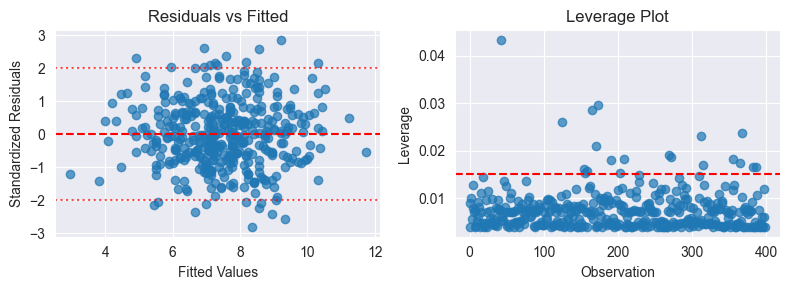

Evidence of problematic observations found


In [40]:
# (h) Check for outliers and high leverage observations
print("=== OUTLIERS AND HIGH LEVERAGE CHECK ===")

# Get diagnostic statistics
residuals = model_reduced.resid
leverage = model_reduced.get_influence().hat_matrix_diag
standardized_resid = residuals / np.std(residuals)

n = len(residuals)
p = 3  # intercept + Price + US_Yes

# Check for outliers (|standardized residual| > 2)
outliers = np.where(np.abs(standardized_resid) > 2)[0]
print(f"Outliers (|std residual| > 2): {len(outliers)} observations")

# Check for high leverage (leverage > 2p/n)
leverage_threshold = 2 * p / n
high_leverage = np.where(leverage > leverage_threshold)[0]
print(f"High leverage (> {leverage_threshold:.3f}): {len(high_leverage)} observations")

# Simple plot
plt.figure(figsize=(8, 3))

plt.subplot(1, 2, 1)
plt.scatter(model_reduced.fittedvalues, standardized_resid, alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')
plt.axhline(y=2, color='red', linestyle=':', alpha=0.7)
plt.axhline(y=-2, color='red', linestyle=':', alpha=0.7)
plt.xlabel('Fitted Values')
plt.ylabel('Standardized Residuals')
plt.title('Residuals vs Fitted')

plt.subplot(1, 2, 2)
plt.scatter(range(n), leverage, alpha=0.7)
plt.axhline(y=leverage_threshold, color='red', linestyle='--')
plt.xlabel('Observation')
plt.ylabel('Leverage')
plt.title('Leverage Plot')

plt.tight_layout()
plt.show()

# Conclusion
if len(outliers) > 0 or len(high_leverage) > 0:
    print("Evidence of problematic observations found")
else:
    print("No strong evidence of outliers or high leverage points")

### Question 12
This problem involves simple linear regression without an intercept.

(a) Recall that the coefficient estimate ˆ # for the linear regression of
Y onto X without an intercept is given by (3.38). Under what
circumstance is the coefficient estimate for the regression of X
onto Y the same as the coefficient estimate for the regression of
Y onto X?

The coefficient estimates are equal when X and Y have the same sum of squares: Σxᵢ² = Σyᵢ²

(b) Generate an example in Python with n = 100 observations in
which the coefficient estimate for the regression of X onto Y
is different from the coefficient estimate for the regression of Y
onto X.

In [41]:
# (b) Example where Y on X coefficient differs from X on Y coefficient
from sklearn.linear_model import LinearRegression

# Generate data
np.random.seed(42)
x = np.arange(100).reshape(-1, 1)
y = (x.flatten() + np.random.normal(size=100)).reshape(-1, 1)

# Regression without intercept
lr = LinearRegression(fit_intercept=False)

# Y on X
lr.fit(x, y)
coef_y_on_x = lr.coef_[0][0]

# X on Y
lr.fit(y, x)
coef_x_on_y = lr.coef_[0][0]

print("REGRESSION COEFFICIENTS:")
print(f"Y on X: {coef_y_on_x:.6f}")
print(f"X on Y: {coef_x_on_y:.6f}")
print(f"Different: {coef_y_on_x != coef_x_on_y}")

# Verify relationship
correlation = np.corrcoef(x.flatten(), y.flatten())[0, 1]
print(f"\nVerification: β₁ × β₂ = {coef_y_on_x * coef_x_on_y:.6f}")
print(f"r² = {correlation**2:.6f}")

REGRESSION COEFFICIENTS:
Y on X: 0.998788
X on Y: 1.000962
Different: True

Verification: β₁ × β₂ = 0.999749
r² = 0.999026


(c) Generate an example in Python with n = 100 observations in
which the coefficient estimate for the regression of X onto Y is
the same as the coefficient estimate for the regression of Y onto
X.

In [42]:
# (c) Example where Y on X coefficient equals X on Y coefficient
from sklearn.linear_model import LinearRegression

# Generate data with equal sum of squares
np.random.seed(42)
x = np.random.normal(0, 1, 100)
y = np.random.normal(0, 1, 100)

# Add correlation and scale Y to have same sum of squares as X
correlation = 0.7
y = correlation * x + np.sqrt(1 - correlation**2) * y
y = y * np.sqrt(np.sum(x**2) / np.sum(y**2))  # Scale to equal sum of squares

# Reshape for sklearn
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

# Regression without intercept
lr = LinearRegression(fit_intercept=False)

# Y on X
lr.fit(x, y)
coef_y_on_x = lr.coef_[0][0]

# X on Y
lr.fit(y, x)
coef_x_on_y = lr.coef_[0][0]

print("REGRESSION COEFFICIENTS:")
print(f"Y on X: {coef_y_on_x:.6f}")
print(f"X on Y: {coef_x_on_y:.6f}")
print(f"Equal: {abs(coef_y_on_x - coef_x_on_y) < 1e-10}")

print(f"\nVerification:")
print(f"Sum of x²: {np.sum(x**2):.2f}")
print(f"Sum of y²: {np.sum(y**2):.2f}")
print("Coefficients are equal when sum of squares are equal")

REGRESSION COEFFICIENTS:
Y on X: 0.628904
X on Y: 0.628904
Equal: True

Verification:
Sum of x²: 82.73
Sum of y²: 82.73
Coefficients are equal when sum of squares are equal
